**Mechine Learning Pipeline**

1.Import Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

2.Dataset

In [3]:
data = {
    "Study_Hours": [1,2,3,4,5,6,7,8,9,10],
    "Attendance": [50,55,60,65,70,75,80,85,90,95],
    "Previous_Score": [35,40,45,50,55,60,65,70,75,80],
    "Pass": [0,0,0,0,0,1,1,1,1,1]
}

df = pd.DataFrame(data)

x = df.drop("Pass", axis=1)
y = df["Pass"]


3.Train Test Split

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

4.Create Pipeline

In [7]:
pipe = Pipeline([("scaler",StandardScaler()),
                 ("model",LogisticRegression(max_iter=1000))])


5.Train pipeline

In [8]:
pipe.fit(x_train,y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not wo

6.Predict & Accuracy

In [13]:
y_pred = pipe.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print("Pipeline Accuracy:",acc)

Pipeline Accuracy: 1.0


7.Cross-Validation with Pipeline

In [23]:
cv_score = cross_val_score(pipe,x,y,cv=5,scoring="accuracy")

print("CV Score:",cv_score)
print("Avg CV Score:",cv_score.mean())

CV Score: [0.5 1.  1.  1.  1. ]
Avg CV Score: 0.9


8.Pipeline with GridSeachCV

In [24]:
param_grid={ "model__C" : [0.1,1,10]}
grid = GridSearchCV(pipe,param_grid,cv=3)
grid.fit(x_train,y_train)

print("Best Params :", grid.best_params_)


Best Params : {'model__C': 0.1}


***9.Visualization***

1.CV vs Test Accuracy

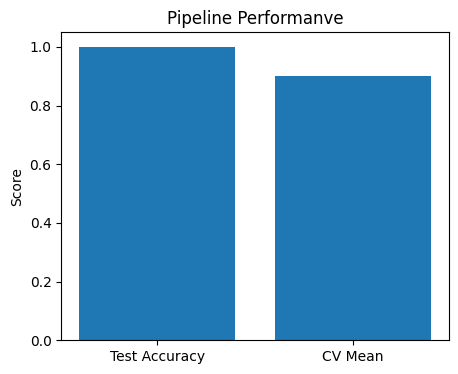

In [31]:
pipeline_acc = acc
pipeline_cv = cv_score.mean()

plt.figure(figsize=(5,4))
plt.bar(["Test Accuracy","CV Mean"],[pipeline_acc,pipeline_cv])
plt.ylim(0,1.05)
plt.ylabel("Score")
plt.title("Pipeline Performanve")
plt.show()

2.Confusion Matrix

Confusion Matrix:
 [[1 0]
 [0 1]]


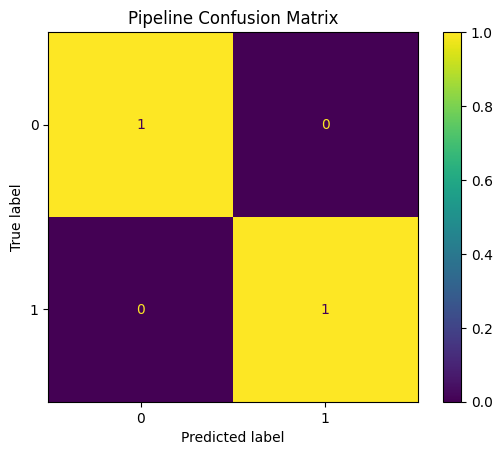

In [35]:
y_pred = pipe.predict(x_test)
cm = confusion_matrix(y_test,y_pred)

print("Confusion Matrix:\n",cm)
ConfusionMatrixDisplay(cm).plot()
plt.title("Pipeline Confusion Matrix")
plt.show()

3.Normal vs Tuned Pipeline

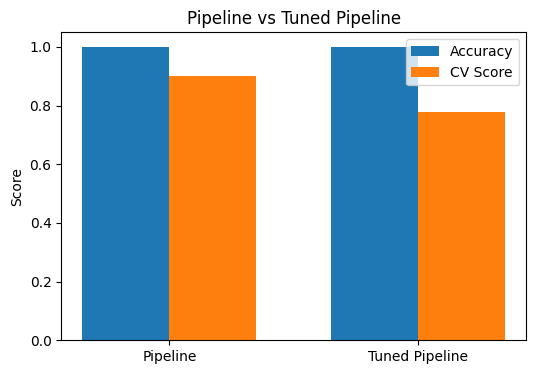

In [37]:
tuned_acc = accuracy_score(y_test,grid.predict(x_test))
tuned_cv = grid.best_score_

labels = ["Pipeline","Tuned Pipeline"]
acc_vals = [pipeline_acc,tuned_acc]
cv_vals = [pipeline_cv,tuned_cv]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(6,4))
plt.bar(x - width/2 , acc_vals , width, label = "Accuracy")
plt.bar(x + width/2, cv_vals, width, label ="CV Score")

plt.xticks(x, labels)
plt.ylim(0,1.05)
plt.ylabel("Score")
plt.title("Pipeline vs Tuned Pipeline")
plt.legend()
plt.show()